<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-41/blob/main/Data_Analysis_with_Python_Modulo4_A01793023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> On this notebook the exercises, practices and follow up from the module 4 will be reviewed. This serves as a demonstrantion and an exercise for the Data Science Class (TC4029) of the MNA Master's degree program of the ITESM and is created by A01793023 - Jorge Luis Arroyo Chavelas. For questions, please reach out to A01793023@tec.mx

# IBM: DA0101EN Data Analysis with Python
---



# Module 4 - Model Development

## Model Development
In this module we will focus in Try to predict a value given a set of features by using a model; a model can be thought of as a mathemtical equation used to predict a value given one ore more other values by relating independent variables (or feature) to a dependant variable of (target).

Model depends on the relevant data used; if good data is passed to a model, then the model will be good, if the variables ommit or have bad data can lead to undesired results.



## Linear Regression and Multiple Linear Regression
Linear regression is a model that takes one variable and creates a prediction (numerical), multiple linear regression uses a set of values to determine the same task.

This help us to determine the relationship between two variables, for linear regression we have a model:

$Y = b_0 + b_1 X$

Where b0 is an intercept and b1 a coefficient of a line; we can input the values of X to the model to determine a prediced Y. These values b0 and b1 are known as parameters of the model.

Models, not excluding of course linear regression, can not deal with noise, therefore they do only approdximations.

Using the python libraries like scickit-learn we do this with declaring a model, fitting the data and then predict by passing values against the function created. In code we use:

``` python
import pandas as pd
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['feature_1']]
Y = df['target']
lm.fit(X,Y)
yhat=lm.predict(X)
```

This give us:

``` python
lm.intercept_
lm.coef_
```
where the first line is $b_0$ and $b_1$ would be the second line.

Multiple linear regression works the same way but for more variables, this in code is:

``` python
import pandas as pd
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['feature_1', 'feature_2']]
Y = df['target']
lm.fit(X,Y)
yhat=lm.predict(X)
```

Which would produce:

$Y = b_0 + b_1 X_1 + b_2 X_2$

For this case what would change would be the coefficient from one scalar to a list of those:

``` python
lm.intercept_
```
This will return the values for $b_1$ and $b_2$

It is trivial to see how this scales for more variables.

## Model Evaluation using Visualization

We can use regression pltos to visualize how a fitline work against the features; for two variables we can use and visualize:

``` python
import pandas as pd
import seaborn as sns
sns.regplot(x='feature1', y='target', data=df)
```

This will produce an scatter-plot and a linear regression where we can visualize how good it fits our data.

Other visualization we can use is the residual plot, in python:

``` python
import pandas as pd
import seaborn as sns
sns.residplot(x='feature1', y='target', data=df)
```

For a residual plot we look for randomness, shapes like a curve, something increasing over time or other type of well defined shapes show that the errors of our model are systematic which would mean not a good fit (undertrainned).

Other type of plots we can use are distribution plots where we can see goodnes of fit between the real data and what our model produces

``` python
import pandas as pd
import seaborn as sns
ax1 = sns.distplot(df['target'], hist=False, color='r', label='actual value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted values', ax=ax1)
```


## Polynomial Regression and Pipelines
When a linear model is not the best fit we can use a polynomial regression where the parameters use polynomical values; this is good for curval data instead of linear. Examples are:

Quadratic model:

$\hat{Y} = b_0 + b_1x1 + b_2(x1)^2$

Cubic model:

$\hat{Y} = b_0 + b_1x1 + b_2(x1)^2 + b_3(x1)^3$

Etc...

However we can see that in any case the relationship is linear, is just the variables the ones that are transformed while the parameters $b_1, ..., b_n$ remain linear.

We can achieve this simply by using scikit-learn where we can for example transform our datasets. For example:

X1 | X2 | X1X2 | X1X1 | X2X2
--- | --- | --- | --- | ---
1 | 2 | (1)(2) | 1 | 4

Python ofers a way to do this quite simple with  scikit-learn:

``` python
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)
x_polly = pr.fit_transform(df[['X1','X2']])
x_polly
```

Here we saw a preprocess to create new columns, another useful one is normalization where we can:

``` python
from sklearn.preprocessing import StandardScaler
SCALE=StandardScaler()
SCALE.fit(df[['X1','X2']])
x_scale = SCALE.transform(df[['X1','X2']])
```

So far here we have described that we can transform our data for a better fit and how to normalize it, we want to do this with our dataset before moving it in into our RegressionLine; however, all of those steps can be simplified through a Pipeline from scikit-learn, which will not only simplify our process but also will help us to prevent data-leakage when doing ML.

``` python
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandarsScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Input=[
  ('scale', StandardScaler()),
  ('polynomial', PolynomialFeatures(degree=2)),
  ('model'LinearRegression()),
]

pipe = Pipeline(Input)

## Then we have the methods
pipe.train(X,y)
pipe.predict(X)
```

The code above takes the data from X and scale the data, then it does the polynomial transformation and then uses that data to create the linear regression.

## Measures for In-Sample Evaluation
To evaluate numerically our models we can use (for numericals):

$MSE =  \frac{1}{n} \sum (y_i - \hat{y}_i)^2 $

$ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2  }{ \sum (y_i - \bar{y}_i)^2} $

The first metric measures the squared difference between the real value and what we predict; it is squared to prevent elimination between positive and negatives. The highier the value the larget the bias between our model and reality (less is better).

The second metric is known as Coefficient of Dtermination and it measures how close the data is fitted to the regression line against a simple model our just the mean. Basically it compares how better or worst is the model versus the most simplistic model, the value follows between 0 and 1 (more is better).

In python we use:

``` python
from sklearn.metrics import mean_squared_error
# for MSE:
mean_squared_error(actual_values, predict_values)
# for R squared:
lm.score(X,y)
```


## Prediction and Decision Making
To determine if a model makes sense we have to do a combination of reviewing our numerical metrics; the visualizations to see goodnes of fit and to interpret if the values predicted makes sense.

For the cases of linear regressions we can explore the regression plot to see how good it fits our data; we can also look at the residual plot to look if errors behave only as noise (random) or if they have a systematic failure mode. We can also compare the numerical values like MSE or $R^2$ to see how good our model is responding, another method is to use fake data to see if the results that is producing are coherent with the observed reality.

At the end, one of the best methods to determine if a model is good or not is to run it against real data; now this might be a huge risk or a high cost for production data, and this is why we tend to use train sets for learning the data, validation sets to improve the model and test sets to review how the model behaves against unseen data. This method, however, still depends on the iteration of using the visualizations and numerical values to improve during the trainning and validation steps.

## LAB 4 - Model Development

## 0. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
# Import pandas library
import pandas as pd

# Read the online file by the URL provides above, and assign it to variable "df"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression and Multiple Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression

### Linear Regression

In [3]:
lm = LinearRegression()
lm

LinearRegression()

In [4]:
X = df[['highway-mpg']]
Y = df['price']

In [5]:
lm.fit(X,Y)

LinearRegression()

In [6]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
lm.intercept_

38423.3058581574

In [8]:
lm.coef_

array([-821.73337832])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear regression object called "lm1".</b>

</div>

In [9]:
lm1 = LinearRegression()
lm1

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 b): </h1>

<b>Train the model using "engine-size" as the independent variable and "price" as the dependent variable?</b>

</div>

In [10]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c):</h1>

<b>Find the slope and intercept of the model.</b>

</div>

In [11]:
lm1.coef_

array([[166.86001569]])

In [12]:
lm1.intercept_

array([-7963.33890628])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 d): </h1>

<b>What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".</b>

</div>


In [13]:
Yhat = lm1.intercept_ + lm1.coef_[0]*X

Price = lm1.intercept_ + lm1.coef_[0]*df['engine-size']

### Multiple Linear Regression

In [14]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [15]:
lm.fit(Z, df['price'])

LinearRegression()

In [16]:
lm.intercept_

-15806.62462632922

In [17]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2 a): </h1>
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg".
</div>


In [18]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 b): </h1>
<b>Find the coefficient of the model.</b>
</div>


In [19]:
lm2.coef_

array([   1.49789586, -820.45434016])

## 2. Model Evaluation Using Visualization

### Regression Plot

In [20]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48166.295095902264)

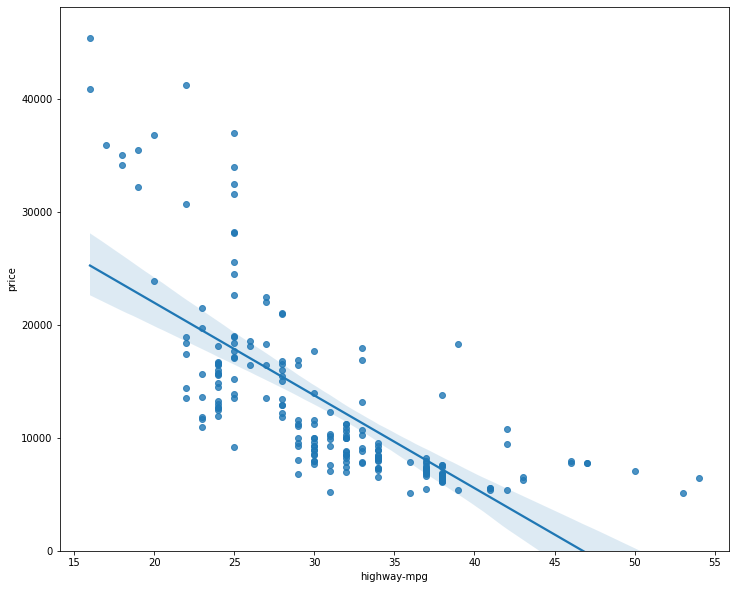

In [21]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

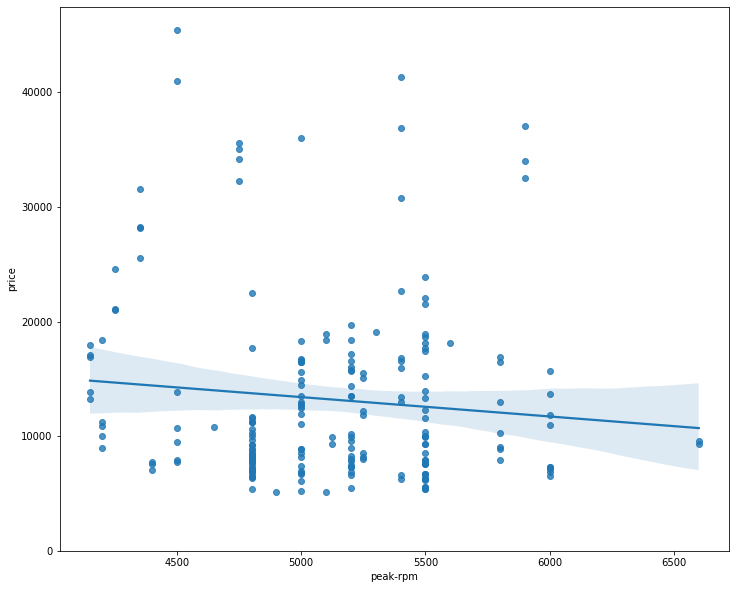

In [22]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Question #3:
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [23]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot

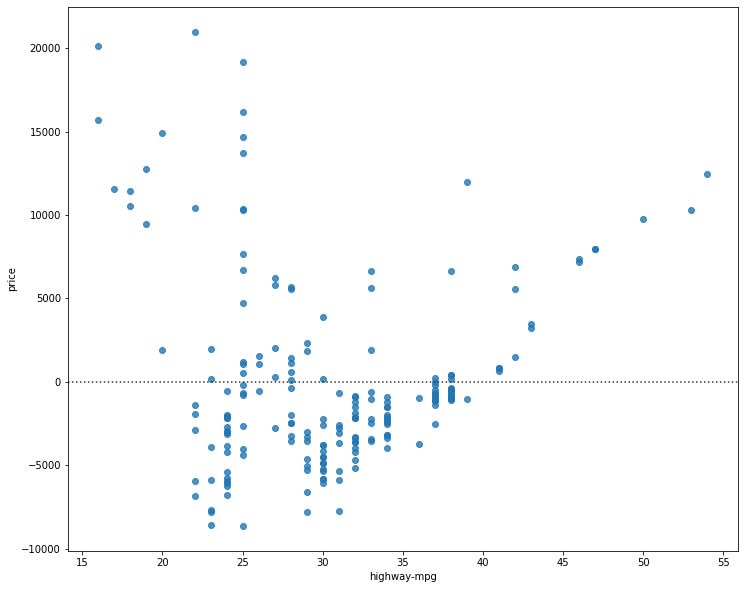

In [24]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

### Multiple Linear Regression

In [25]:
Y_hat = lm.predict(Z)

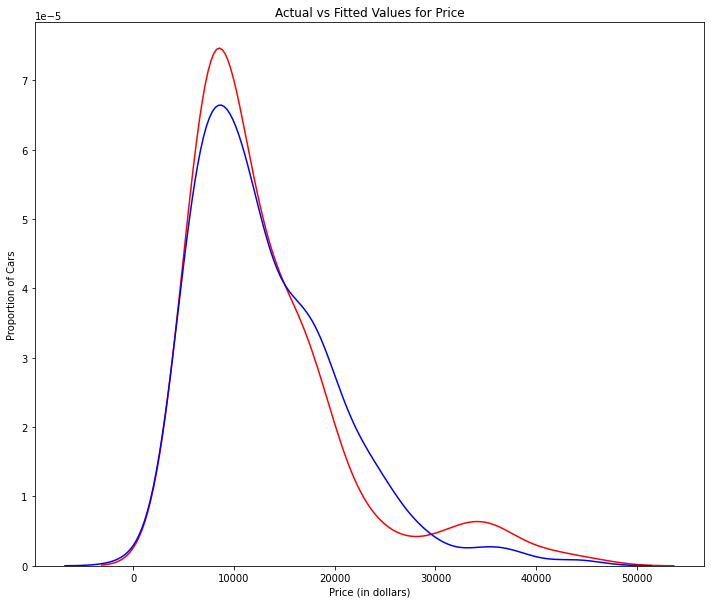

In [26]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
    sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


    plt.title('Actual vs Fitted Values for Price')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

## 3. Polynomial Regression and Pipelines

### Polynomial regression

In [27]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [28]:
x = df['highway-mpg']
y = df['price']

In [29]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


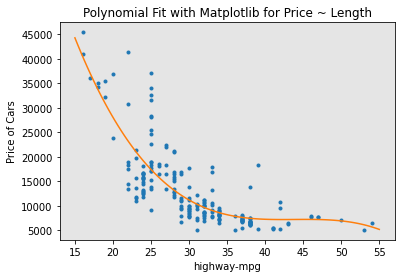

In [30]:
PlotPolly(p, x, y, 'highway-mpg')

In [31]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Create 11 order polynomial model with the variables x and y from above.</b>
</div>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


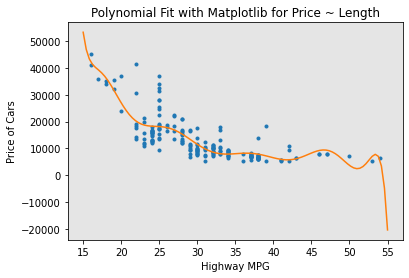

In [32]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'Highway MPG')

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [35]:
Z_pr=pr.fit_transform(Z)

In [36]:
Z.shape

(201, 4)

In [37]:
Z_pr.shape

(201, 15)

### Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
Input=[
    ('scale',StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model',LinearRegression())
]

In [40]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [41]:
Z = Z.astype(float)
pipe.fit(Z,df['price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [42]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.</b>
</div>


In [43]:
Input=[
    ('scale',StandardScaler()),
    ('model',LinearRegression())
]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## 4. Measures for In-Sample Evaluation

### Model 1: Simple Linear Regression

In [44]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [45]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Model 2: Multiple Linear Regression

In [48]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [49]:
Y_predict_multifit = lm.predict(Z)

In [50]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3: Polynomial Fit

In [51]:
from sklearn.metrics import r2_score

In [52]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


### MSE

In [53]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## 5. Prediction and Decision Making

### Prediction

In [54]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [55]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [56]:
lm.fit(X, Y)
lm

LinearRegression()

In [57]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

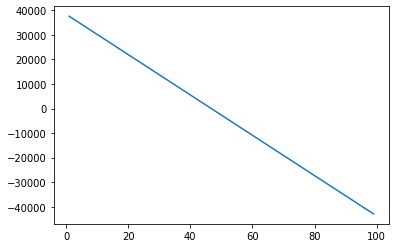

In [58]:
plt.plot(new_input, yhat)
plt.show()

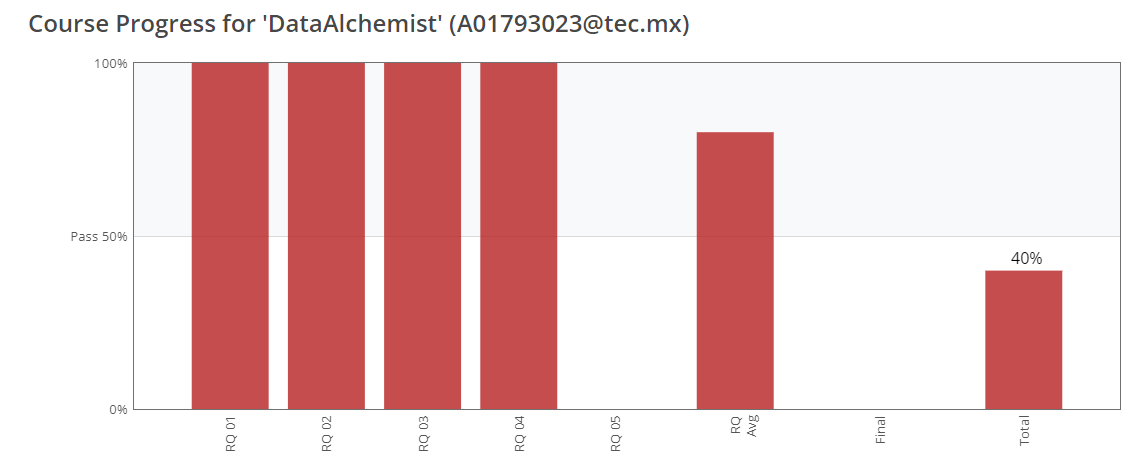

---
--- Fin ---